# Predicting the Assassin Email spam or not
Here we will predict if an email is spam or not implementing different Machine Learning Algorithms depending on which algorithm has more accuracy rate.


In [1]:
# Importing libraries
import pandas as pd
import nltk
import numpy as np
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
#Importing the dataset from Kaggle
df = pd.read_csv("spam-assassin-email-classification-dataset/spam_assassin.csv")

In [3]:
#Initial No. of Rows and Clumns in the dataset
df

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0
...,...,...
5791,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0
5792,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0
5793,Received: from hq.pro-ns.net (localhost [127.0...,1
5794,From razor-users-admin@lists.sourceforge.net T...,0


In [4]:
#To display max column width
#pd.set_option('display.max_colwidth', None)
#df.head()

In [5]:
#Removing duplicates
df.drop_duplicates(inplace=True)

In [6]:
#Unique dataset after removing duplicates
df.shape

(5329, 2)

In [7]:
#Number of Spam emails
(df[df.target==1]).shape

(1691, 2)

In [8]:
#Number of Ham emails
(df[df.target==0]).shape

(3638, 2)

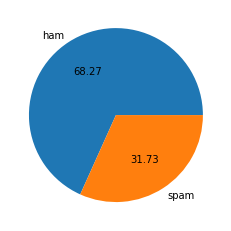

In [9]:
#Pie chart
plt.pie(df['target'].value_counts(),labels=["ham",'spam'],autopct="%0.2f")
plt.show()

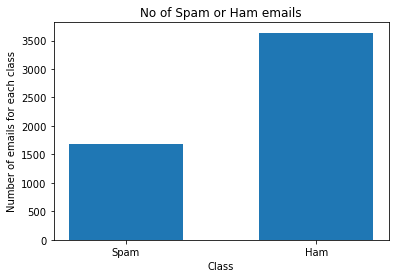

In [10]:
#Bar diagram
x=["Spam","Ham"]
h=[1691,3638]
plt.bar(x,h,0.6)
plt.xlabel("Class")
plt.ylabel("Number of emails for each class")
plt.title("No of Spam or Ham emails")
plt.show()

In [11]:
#Checking for null data
df.isnull().sum()

text      0
target    0
dtype: int64

In [12]:
#no. of chracters in each email
df['num_character']=df['text'].apply(len)

In [13]:
df.head()

,text,target,num_character
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,4098
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,2189
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,3598
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,1918
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,3060


In [14]:
#no. of words in each email
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [15]:
df.head()

,text,target,num_character,num_words
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,4098,818
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,2189,520
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,3598,640
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,1918,451
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,3060,620


In [16]:
#no. of sentences in each email
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
df.head()

,text,target,num_character,num_words,num_sent
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,4098,818,16
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,2189,520,13
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,3598,640,11
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,1918,451,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,3060,620,7


In [18]:

df[['num_character','num_words','num_sent']].describe()

,num_character,num_words,num_sent
count,5329.000000,5329.000000,5329.000000
mean,4164.186527,799.723400,12.492400
std,6030.253952,908.348262,23.513342
min,362.000000,68.000000,1.000000
25%,2390.000000,447.000000,5.000000
50%,3296.000000,602.000000,8.000000
75%,4492.000000,840.000000,14.000000
max,232305.000000,18622.000000,809.000000


<AxesSubplot:xlabel='num_character', ylabel='Count'>

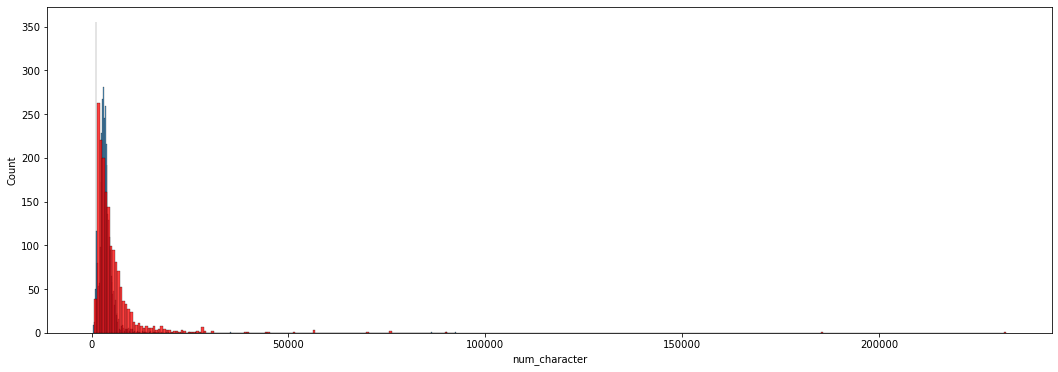

In [19]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

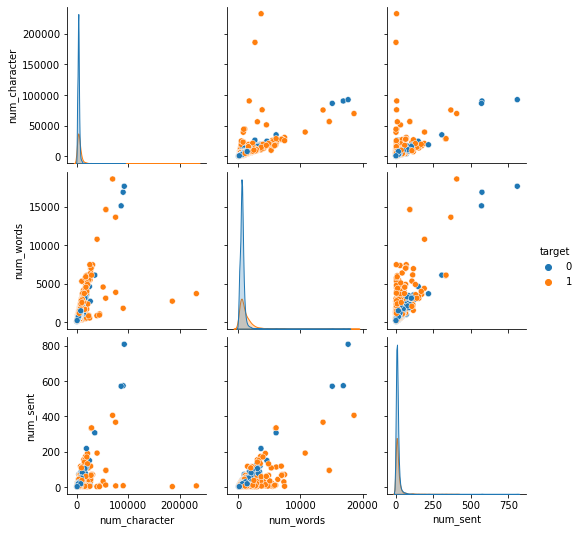

In [20]:
sns.pairplot(df,hue='target')

In [21]:
#Remove punctuation
#Remove stopwords
#Return a list of clean text words
" Stopwords are the words that are useless words. To clean the data we have to remove the punctuations and the stopwords"
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    #tokenize
    text=nltk.word_tokenize(text)
    

    # remove special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    #remove stopwords
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    
    #stemming
    ps = PorterStemmer()
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [22]:
#To show tokenization

"Tokenization is the process in which the sentences or phrases of the dataset are split up into small words or terms, known as Token."

df['clean_text']=df['text'].apply(clean_text)

In [23]:
df

,text,target,num_character,num_words,num_sent,clean_text
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,4098,818,16,mon jul 29 2002 yyyi receiv localhost localhos...
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,2189,520,13,gort44 mon jun 24 2002 gort44 tue jun 4 2002 r...
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,3598,640,11,mon jul 29 2002 yyyi receiv localhost localhos...
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,1918,451,1,dcm123 mon jun 24 2002 dcm123 mon jun 10 2002 ...
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,3060,620,7,mon aug 19 2002 yyyi receiv localhost localhos...
...,...,...,...,...,...,...
5791,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0,3732,703,12,mon jul 22 2002 yyyi receiv localhost localhos...
5792,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0,3334,687,18,mon oct 7 2002 yyyi receiv localhost jalapeno ...
5793,Received: from hq.pro-ns.net (localhost [127.0...,1,5050,1134,5,receiv localhost esmtp id g6llbbcu047091 sun 2...
5794,From razor-users-admin@lists.sourceforge.net T...,0,8068,1460,18,thu sep 12 2002 yyyi receiv localhost jalapeno...


In [24]:
#Word cloud to show frequently used words
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [25]:
#Word cloud to show frequent words in spam emails
spam_wc = wc.generate(df[df['target'] == 1]['clean_text'].str.cat(sep=" "))

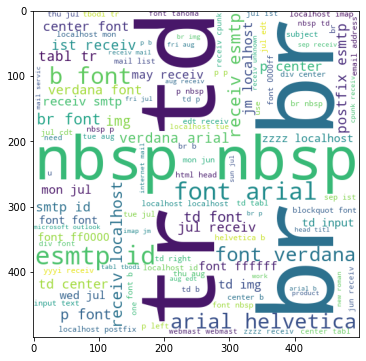

In [26]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [27]:
#Word cloud to show frequent words in ham emails
ham_wc = wc.generate(df[df['target'] == 0]['clean_text'].str.cat(sep=" "))

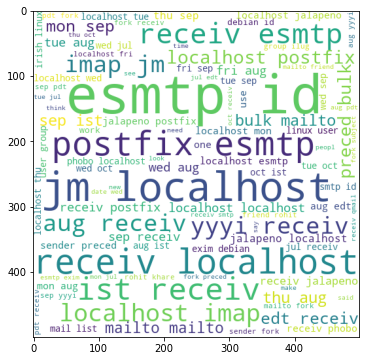

In [28]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [29]:
#Bar plot to show frequency of words in spam emails
spam_corpus = []
for msg in df[df['target'] == 1]['clean_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [30]:
len(spam_corpus)

579824

C:\Users\thaku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


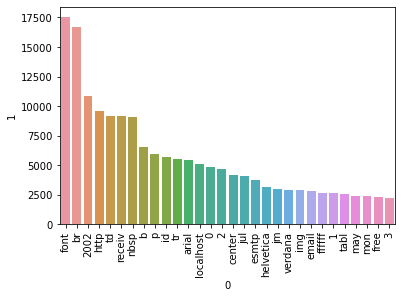

In [31]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
#Bar plot to show frequency of words in ham emails
ham_corpus = []
for msg in df[df['target'] == 0]['clean_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [33]:
len(ham_corpus)

762371

C:\Users\thaku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


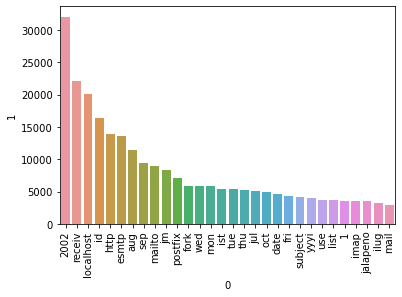

In [34]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_text']).toarray()

In [36]:
X.shape

(5329, 3000)

In [37]:
y = df['target'].values

In [38]:
#Splitting in train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2,shuffle=True, stratify=y)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [40]:
#Naive_Bayes
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9774859287054409
[[726   2]
 [ 22 316]]
0.9937106918238994


In [41]:
#Logistic_Regression 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9868667917448405
[[727   1]
 [ 13 325]]
0.9969325153374233


In [43]:
#importing different machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
#different models with hyperparameter tuning
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [45]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc,  
    'GBDT':gbdt
}

In [46]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [47]:
train_classifier(svc,X_train,y_train,X_test,y_test)
y_pred1 = svc.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.9924953095684803
[[727   1]
 [  7 331]]
0.9969879518072289


In [48]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9924953095684803
Precision -  0.9969879518072289
For  KN
Accuracy -  0.974671669793621
Precision -  0.9844236760124611
For  NB
Accuracy -  0.9774859287054409
Precision -  0.9937106918238994
For  DT
Accuracy -  0.9681050656660413
Precision -  0.9662576687116564
For  LR
Accuracy -  0.9803001876172608
Precision -  0.9937694704049844
For  RF
Accuracy -  0.9887429643527205
Precision -  0.9939393939393939
For  AdaBoost
Accuracy -  0.9868667917448405
Precision -  0.9879518072289156
For  GBDT
Accuracy -  0.9840525328330206
Precision -  0.9938461538461538


In [49]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [50]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.992495,0.996988
5,RF,0.988743,0.993939
7,GBDT,0.984053,0.993846
4,LR,0.980300,0.993769
2,NB,0.977486,0.993711
6,AdaBoost,0.986867,0.987952
1,KN,0.974672,0.984424
3,DT,0.968105,0.966258


In [57]:
#using Deep learning
import re
model =tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
model.fit(X_train,y_train, epochs=10)


Epoch 1/10
134/134 [==============================] - 1s 5ms/step - loss: 0.6413 - accuracy: 0.9118
Epoch 2/10
134/134 [==============================] - 1s 4ms/step - loss: 0.0473 - accuracy: 0.9927
Epoch 3/10
134/134 [==============================] - 1s 4ms/step - loss: 0.0189 - accuracy: 0.9974
Epoch 4/10
134/134 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9988
Epoch 5/10
134/134 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9998
Epoch 6/10
134/134 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7/10
134/134 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 8/10
134/134 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/10
134/134 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/10
134/134 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000

In [60]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

print('\nTest accuracy:', test_acc)

34/34 - 0s - loss: 0.0167 - accuracy: 0.9944 - 372ms/epoch - 11ms/step

Test accuracy: 0.9943714737892151


In [61]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(lr,open('spam_classification_model.pkl','wb'))